## Analyze the dataset.

### 1. Load and Display data and Checking for Missing Values

In [18]:
import pandas as pd

# Load your data
df = pd.read_csv("/kaggle/input/ml-dataset/loan_train.csv")  # or use cudf.read_csv if working with RAPIDS

# Preview the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   540179     697401      10000        10000           9975.0   36 months   
1   585434     752191      14000        14000          13775.0   36 months   
2   457736     569298       9475         9475           9475.0   36 months   
3   734349     930860       4000         4000           4000.0   36 months   
4  1050080    1281522       3600         3600           3600.0   36 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   13.23%       338.05     C        C1  ...        11943.68        10000.00   
1    7.88%       437.94     A        A5  ...        15470.79        14000.00   
2    8.94%       301.04     A        A5  ...        10472.09         9475.00   
3    7.29%       124.04     A        A4  ...         4425.26         4000.00   
4    6.62%       110.54     A        A2  ...         2321.34         2004.17   

  total_rec_int  total_rec_late_fee recoveries col

### 2. Visualize Distributions (Histograms)

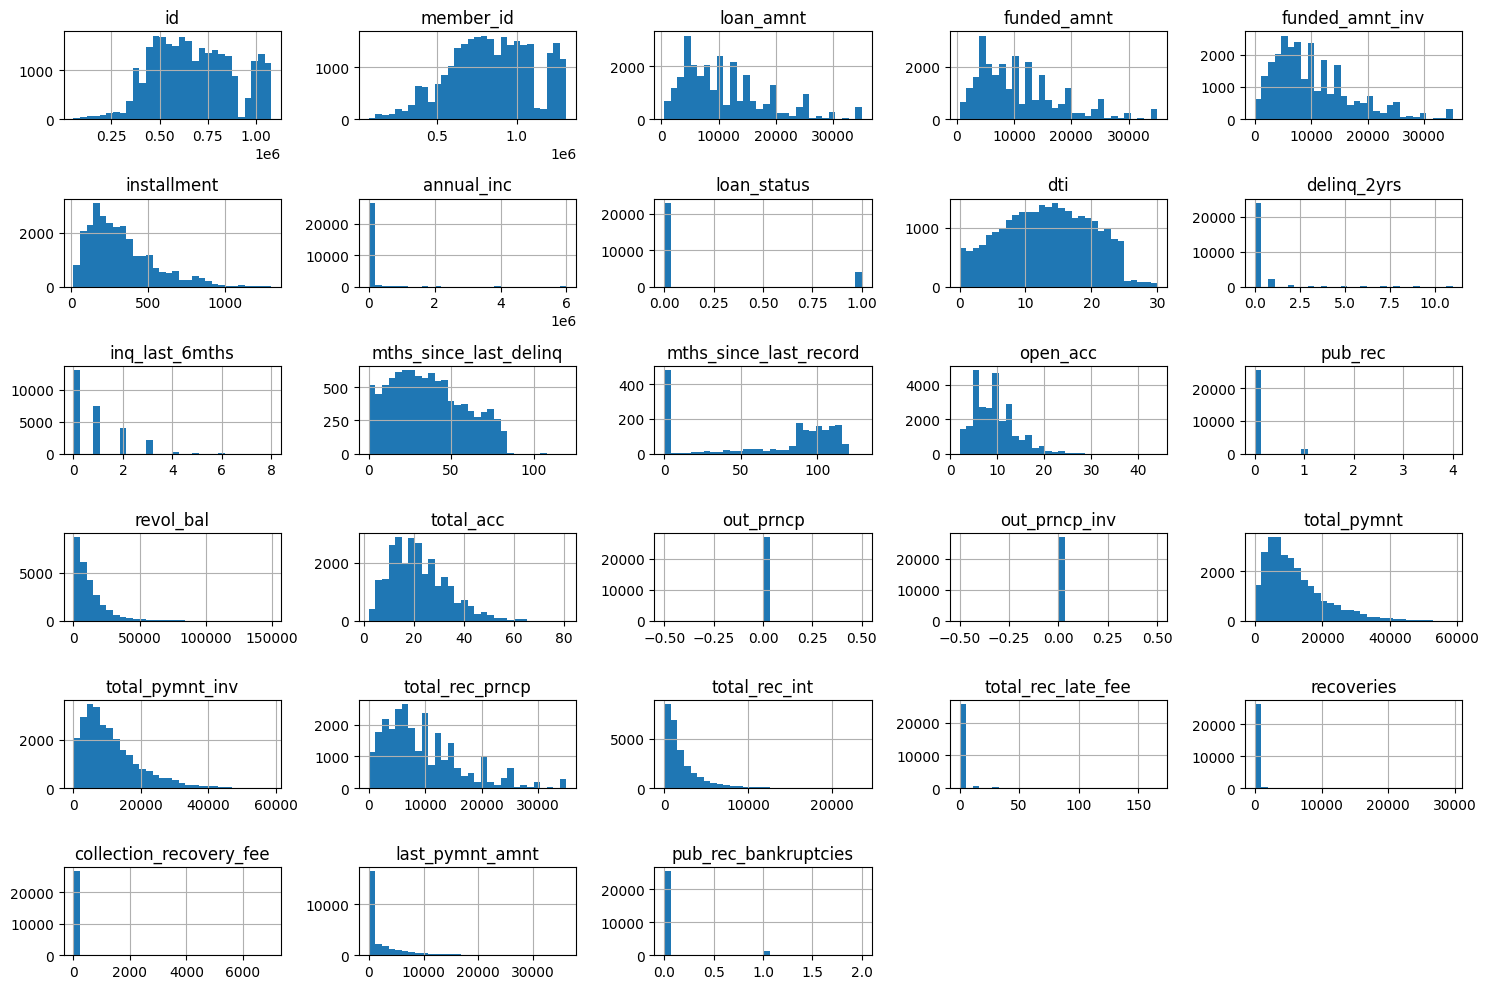

In [19]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 3. Check Feature Correlations

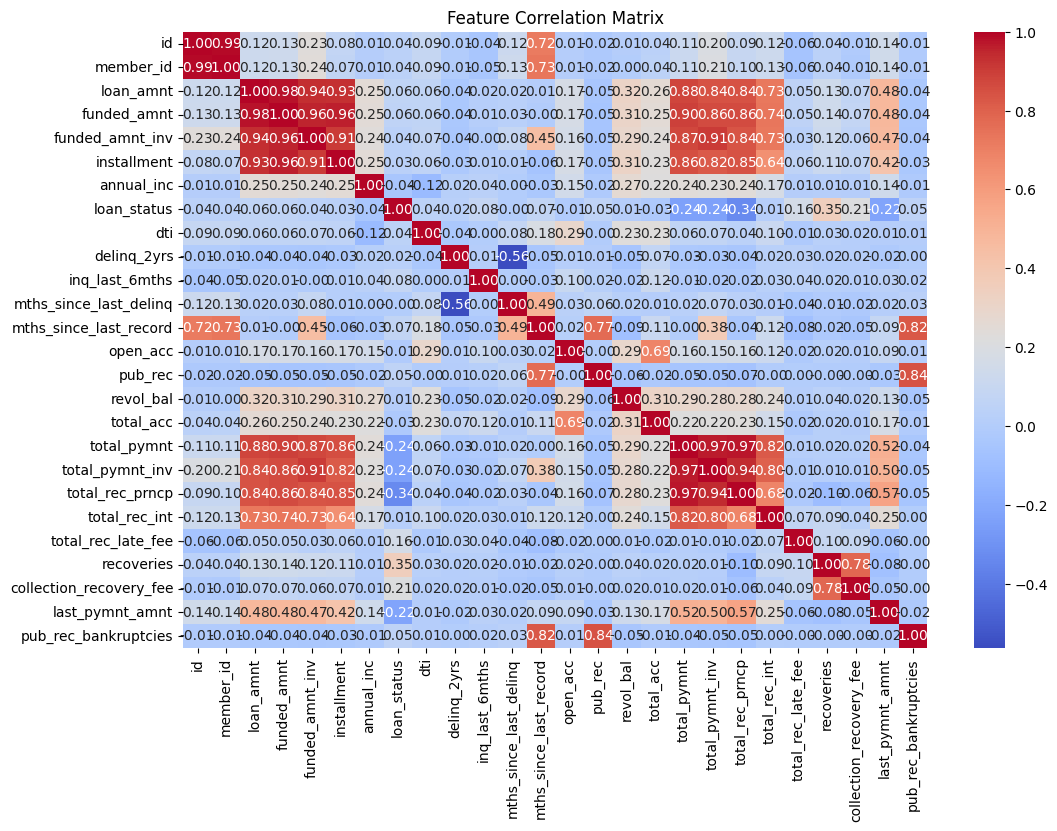

In [24]:
# Select only numeric columns for heatmap
# Columns with the same value across all rows have zero variance, which makes correlation undefined.
df = df.loc[:, df.nunique() > 1]
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

### 4. Look at Random Samples & Outliers

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
20881   711528     904492      18200        18200       18200.0000   
4702    855195    1067503      14000        14000       14000.0000   
942     475768     602449      15000        15000       14964.3938   
3181   1010303    1237107       1500         1500        1500.0000   
26009   596236     765421       4000         4000        4000.0000   

             term int_rate  installment grade sub_grade  ... total_pymnt_inv  \
20881   60 months   15.99%       442.50     D        D2  ...         9732.89   
4702    36 months    5.42%       422.24     A        A1  ...        15200.55   
942     36 months   12.87%       504.50     C        C1  ...        18118.07   
3181    36 months   11.71%        49.62     B        B3  ...          148.32   
26009   36 months    7.88%       125.13     A        A5  ...         4504.88   

      total_rec_prncp total_rec_int  total_rec_late_fee recoveries  \
20881         5044.43       

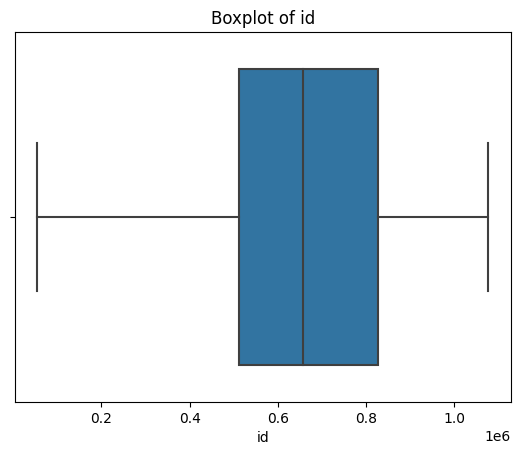

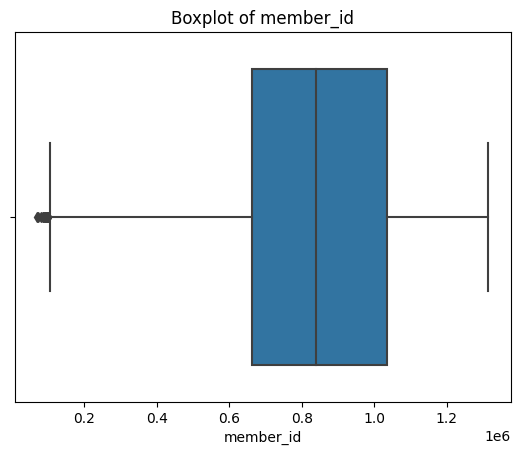

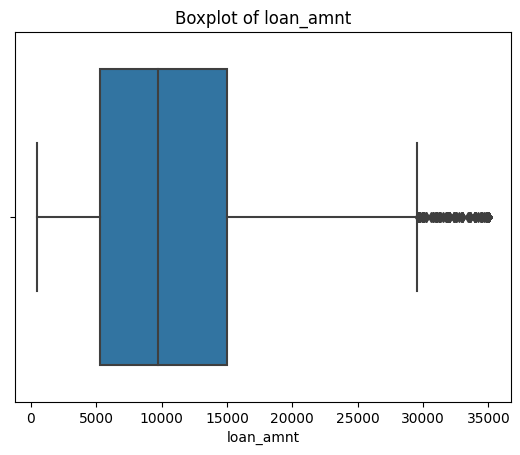

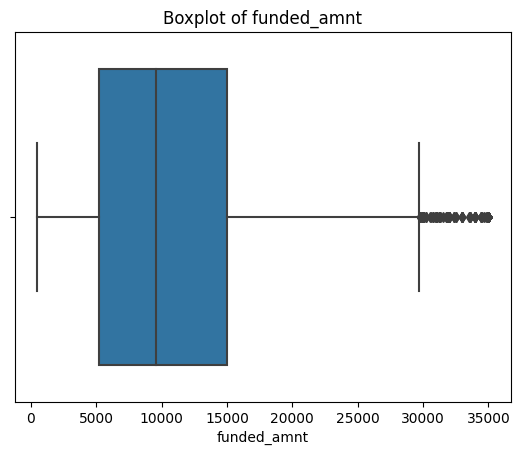

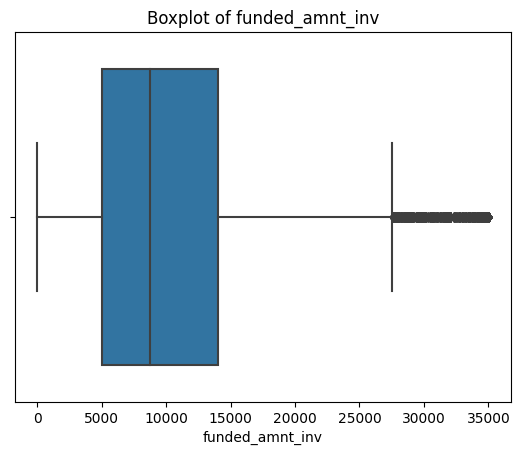

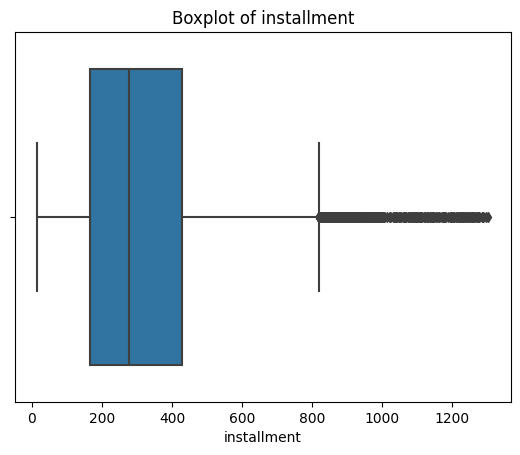

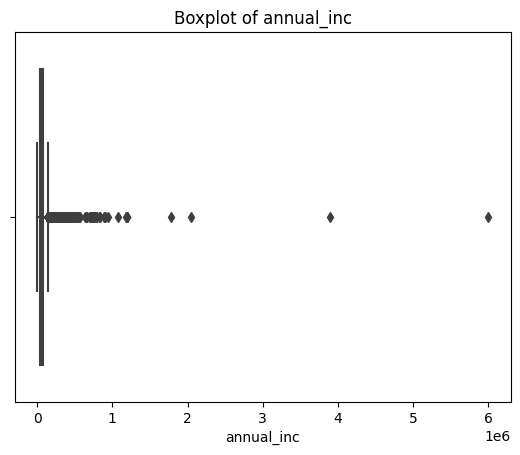

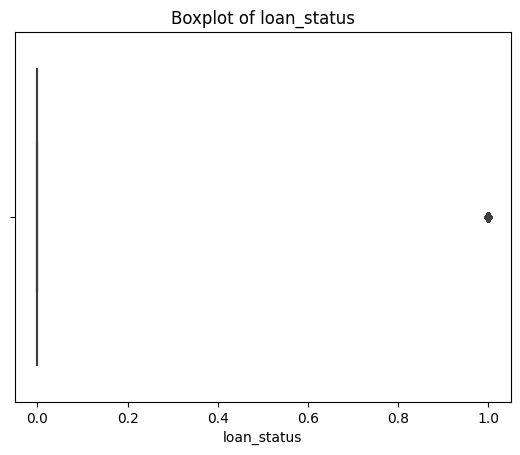

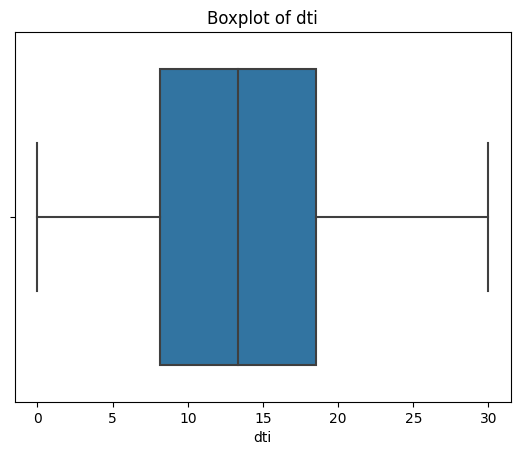

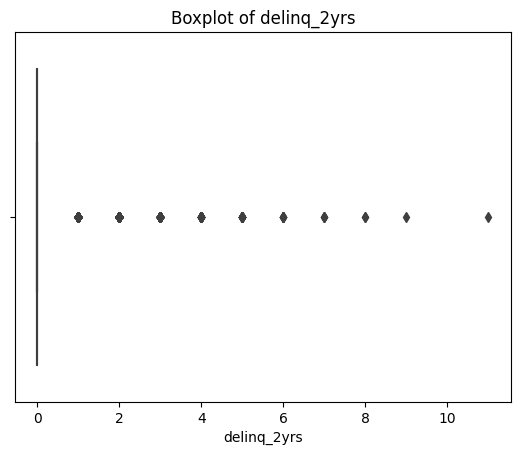

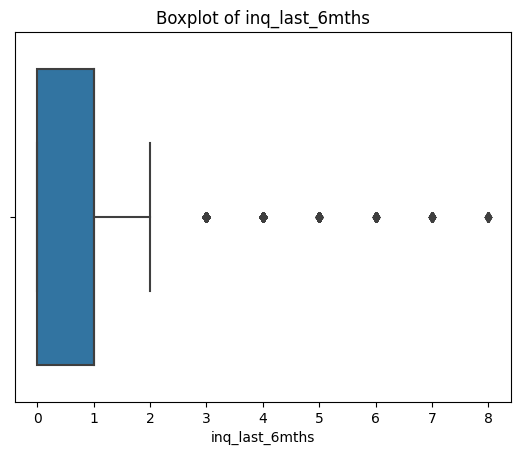

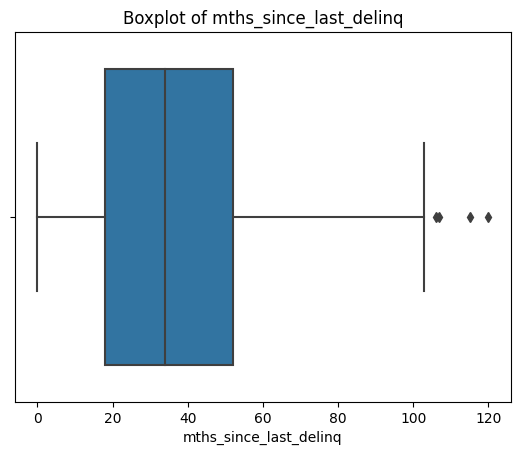

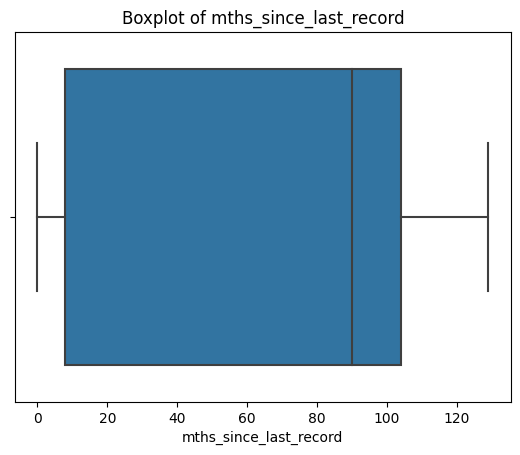

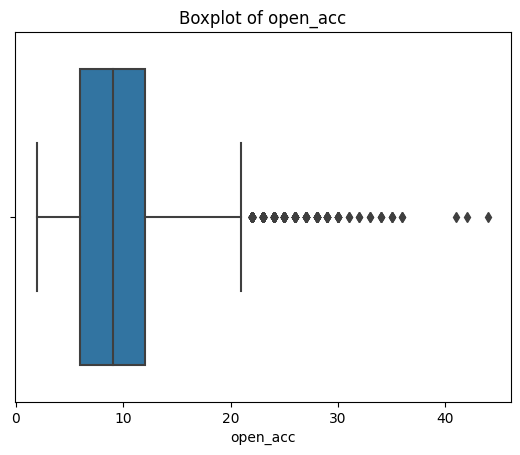

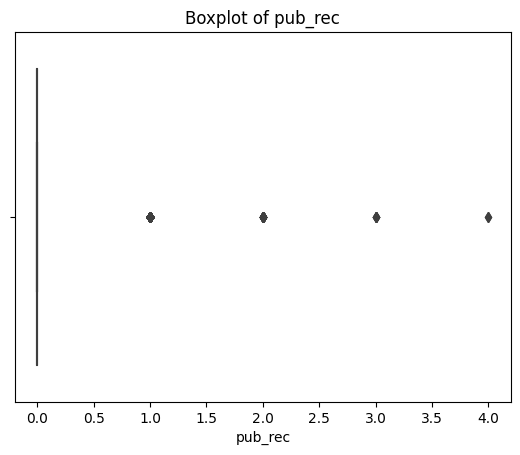

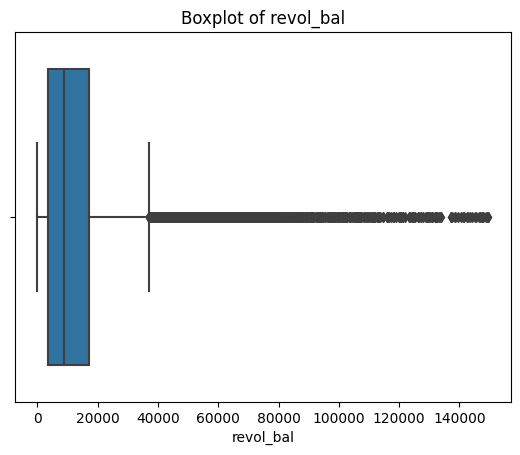

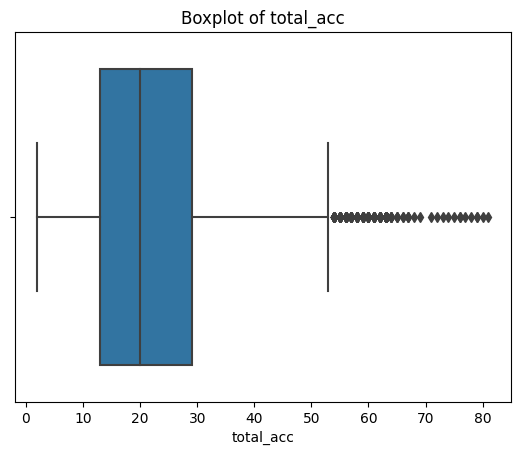

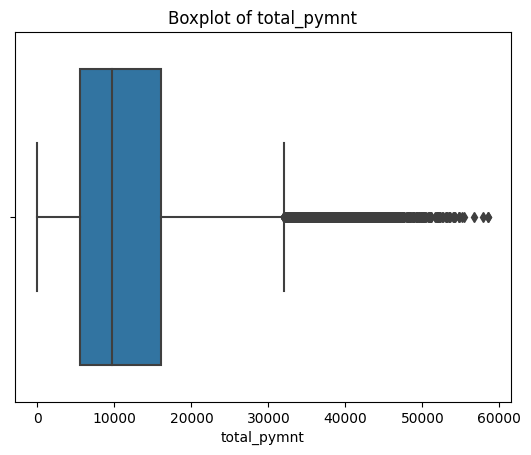

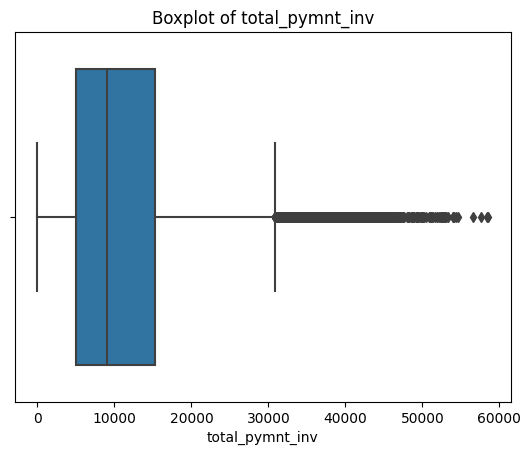

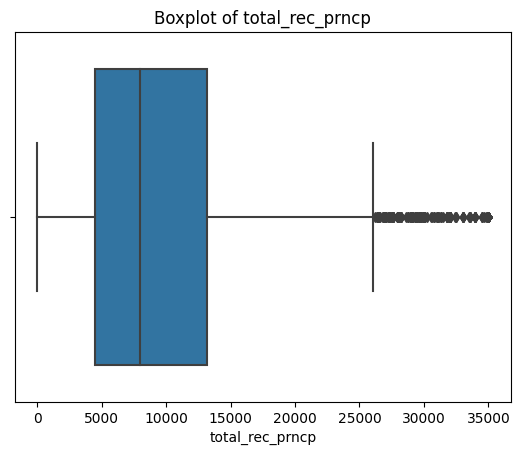

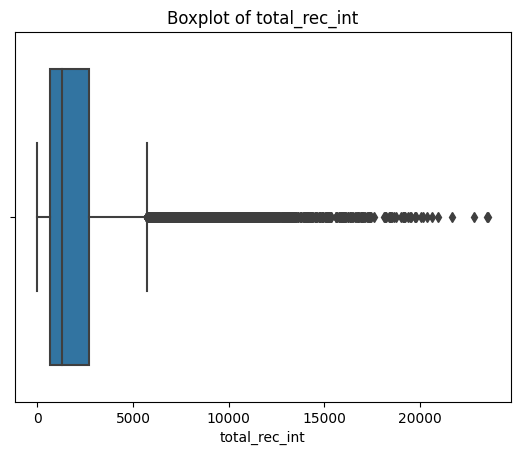

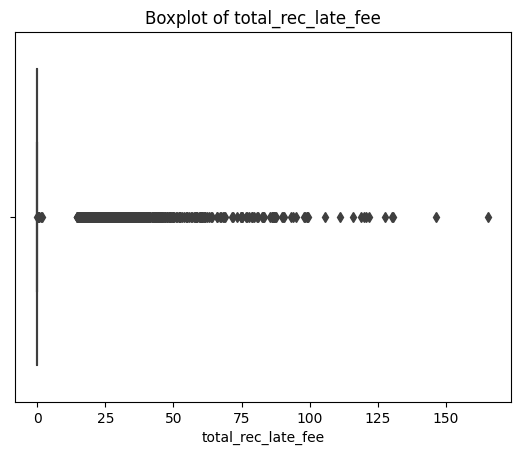

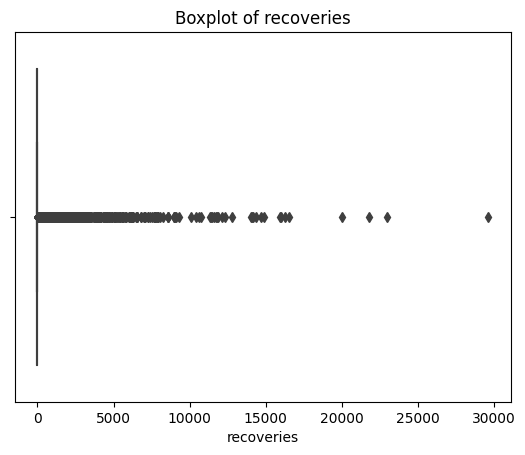

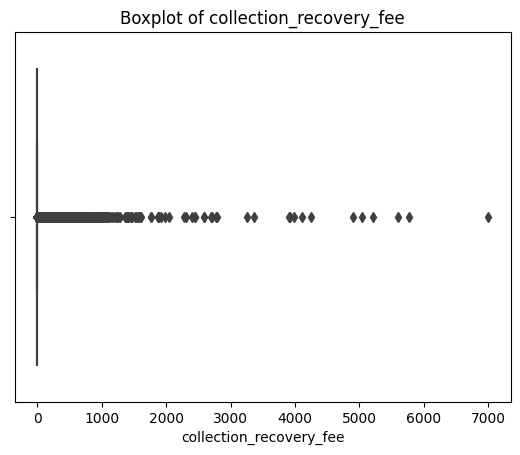

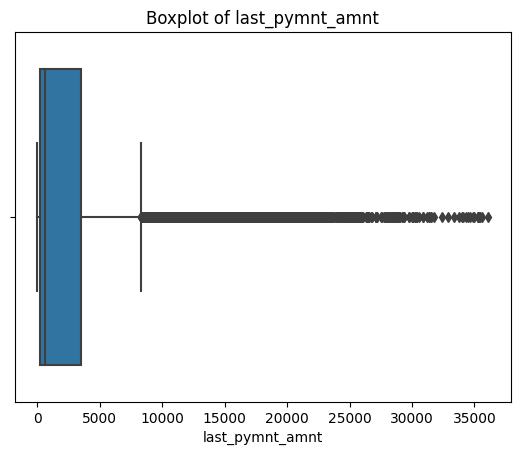

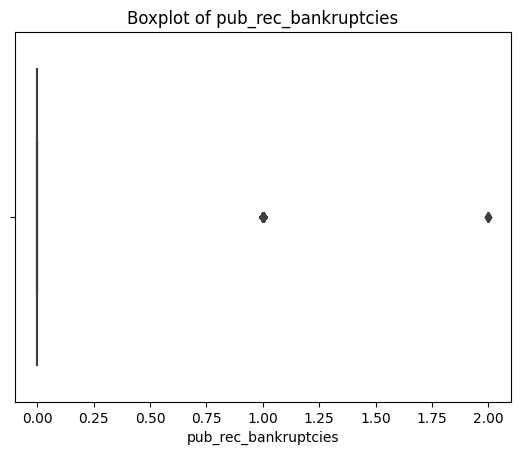

In [25]:
print(df.sample(5))  # Random samples

# Detect outliers in numeric features using boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### 5. Plot Target vs Numerical Features 

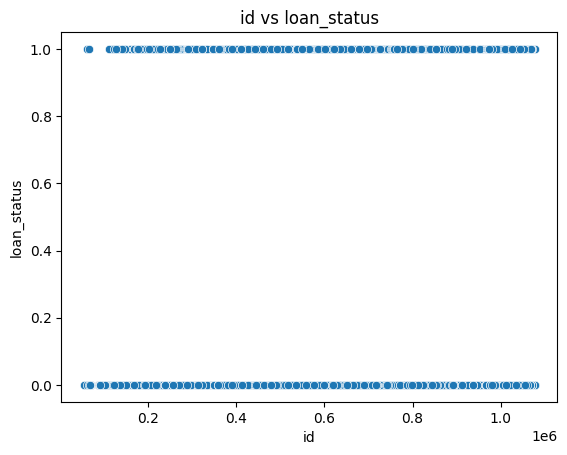

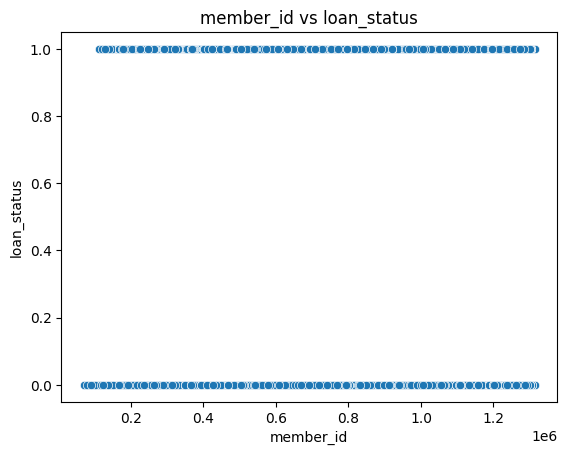

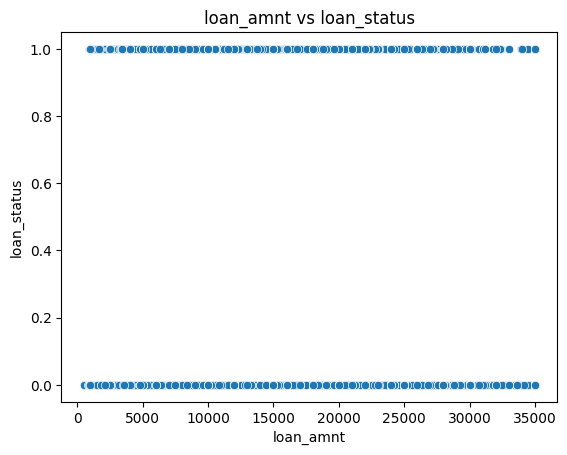

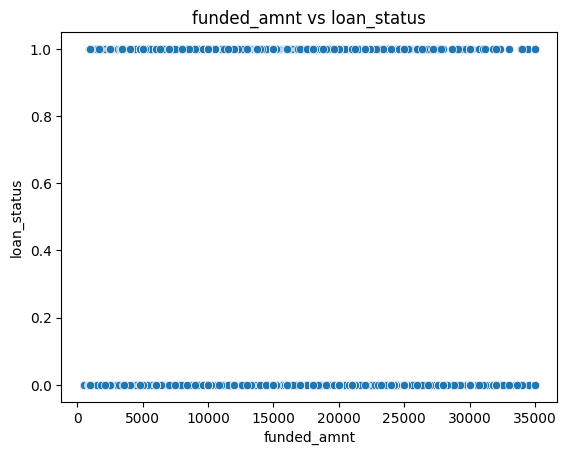

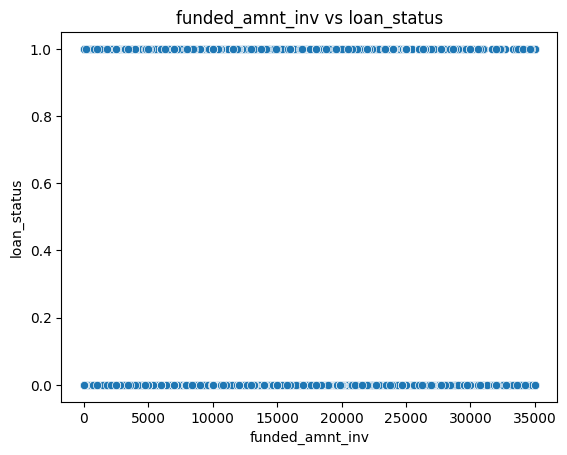

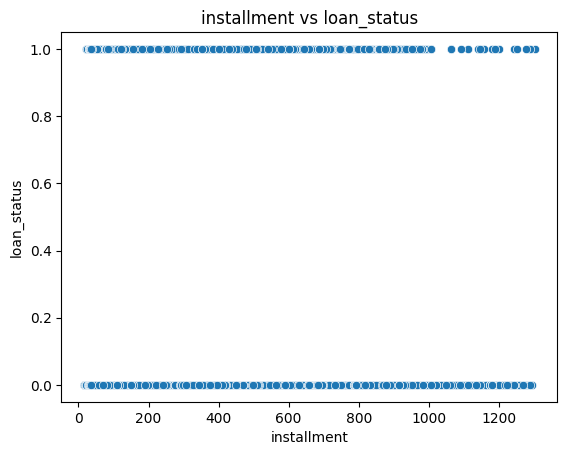

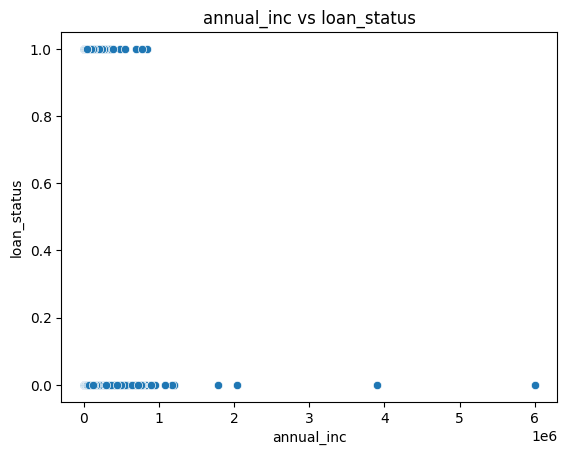

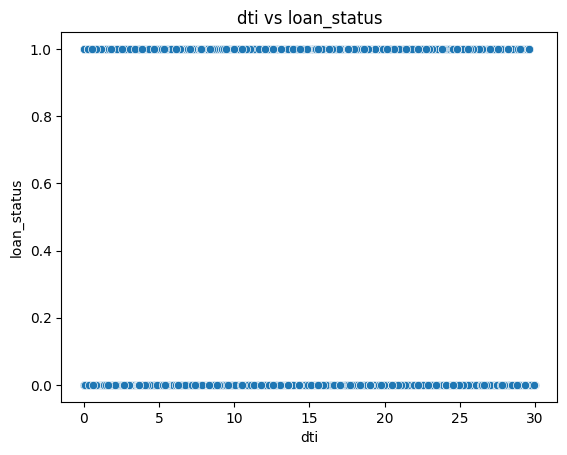

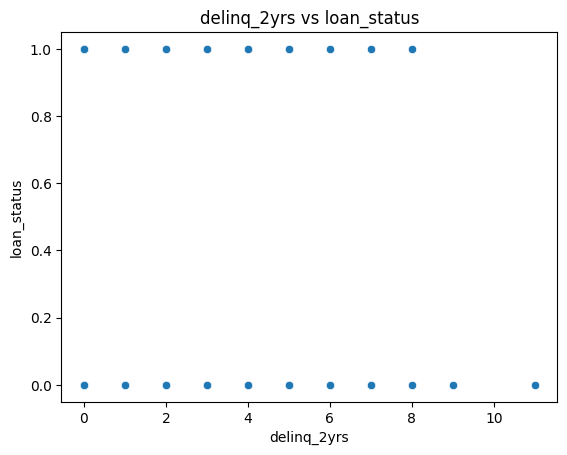

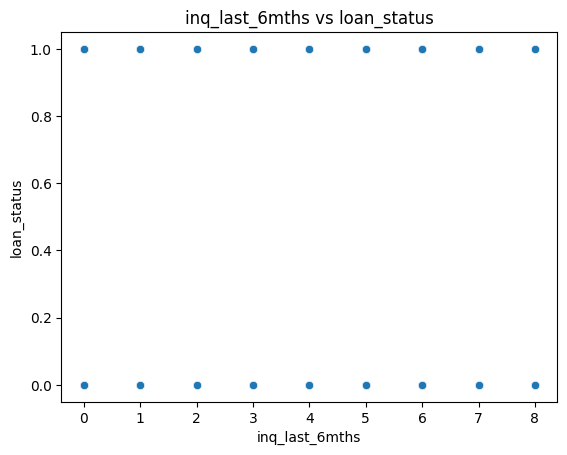

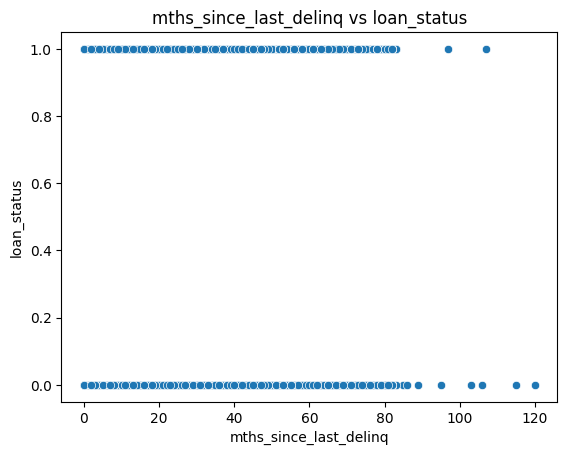

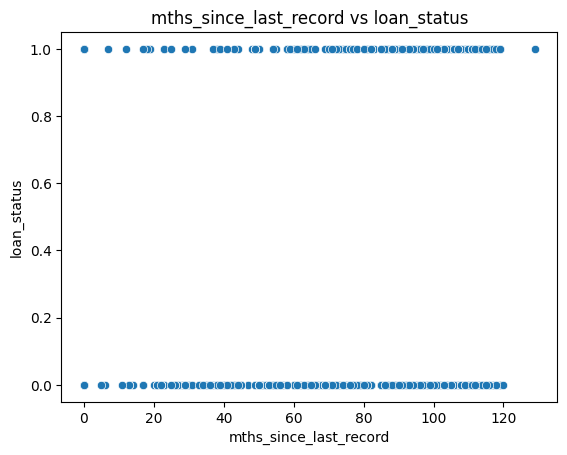

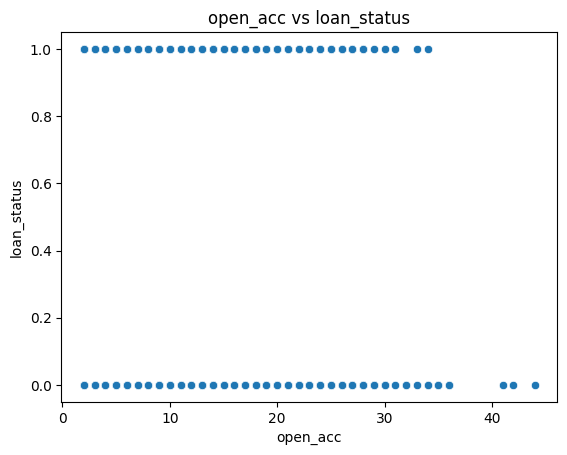

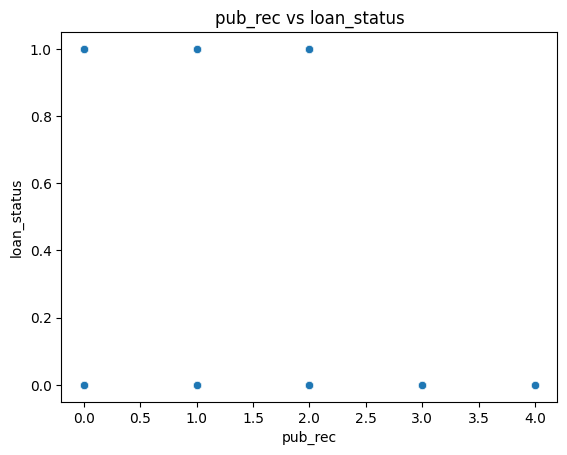

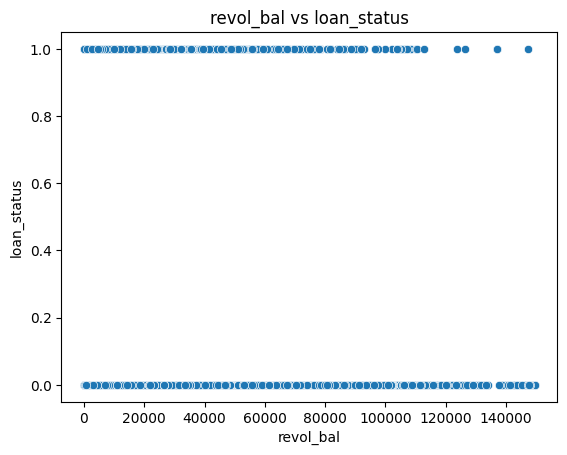

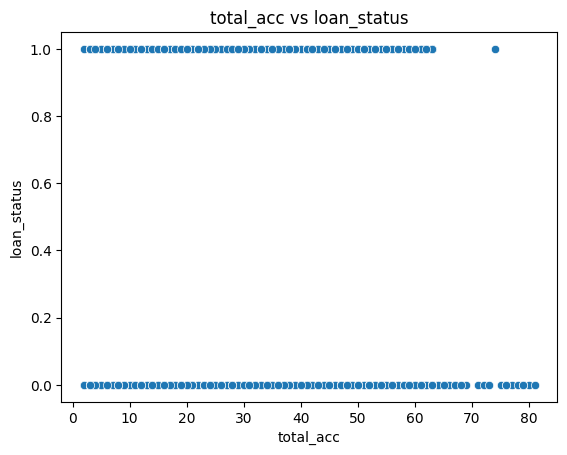

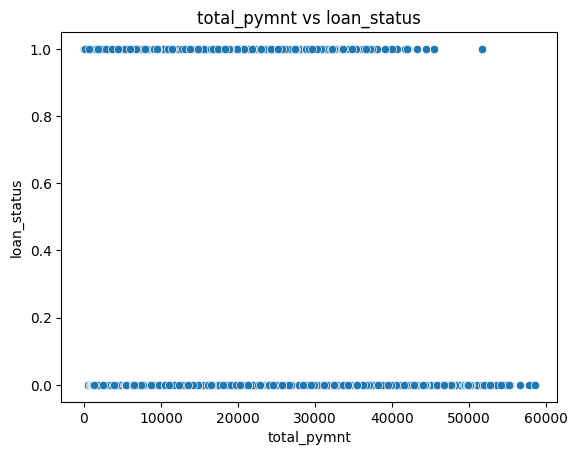

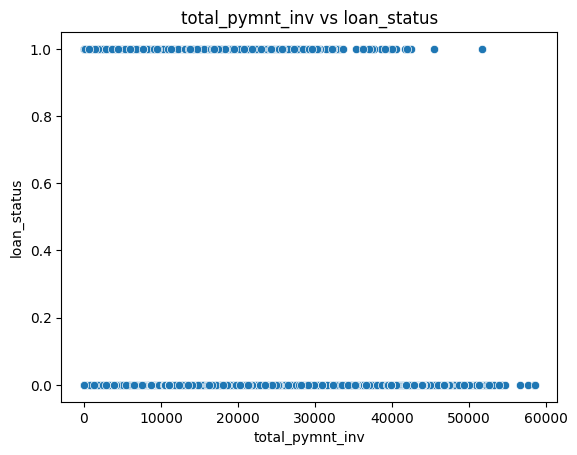

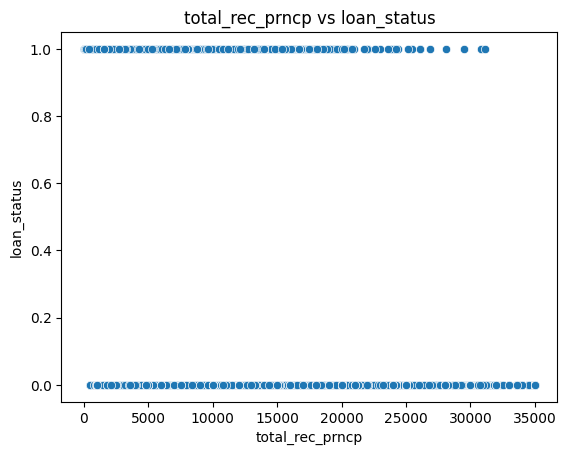

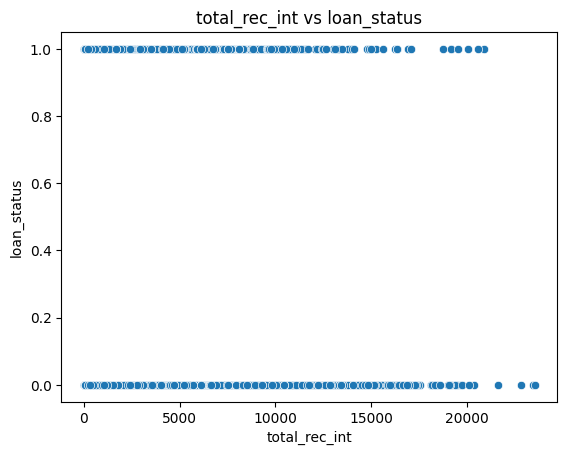

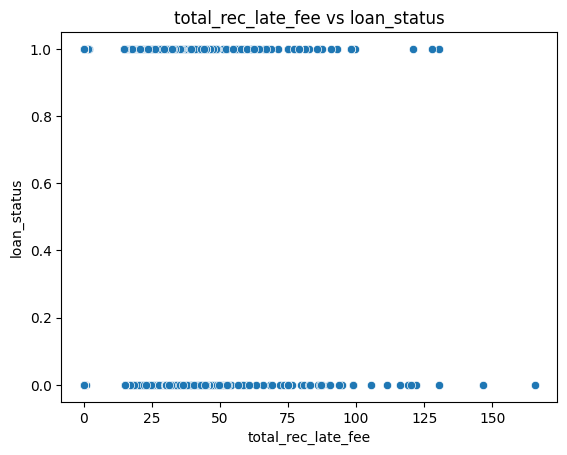

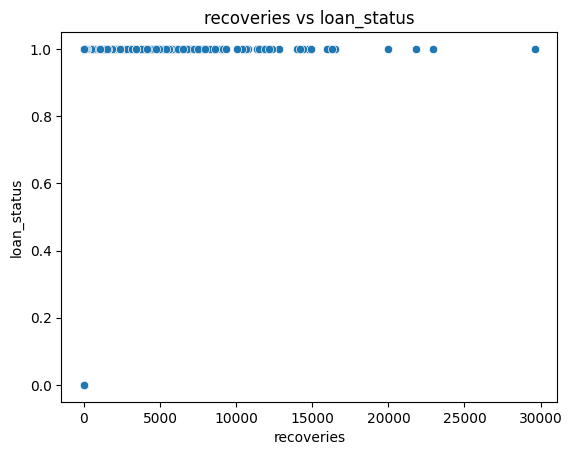

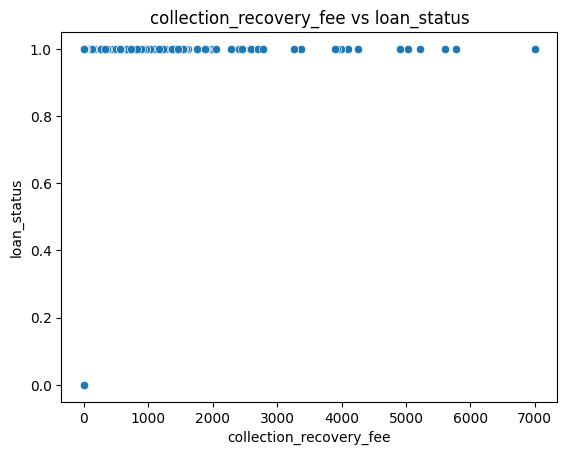

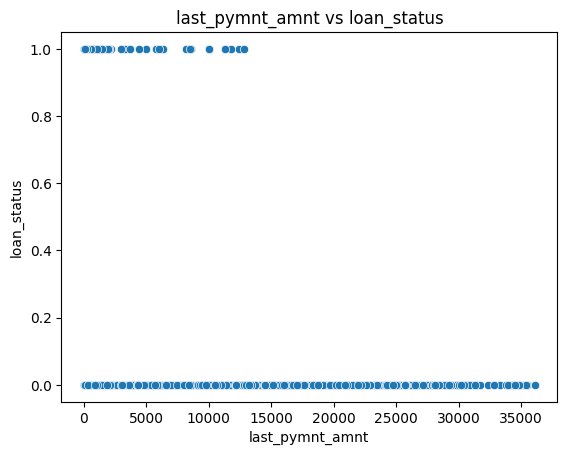

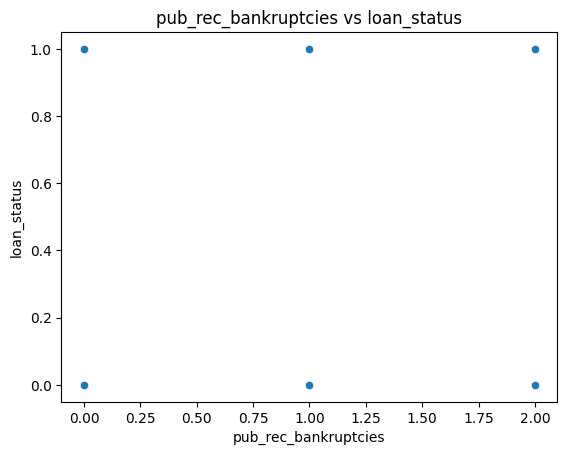

In [27]:
target = "loan_status"

for col in df.columns:
    if col != target and df[col].dtype != 'object':
        plt.figure()
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()

### 6. Use a Baseline Model (e.g., ZeroR)
* ZeroR is a rule-based model that predicts the most frequent class (classification)

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_preds = dummy.predict(X_test)

print("Baseline Accuracy (ZeroR):", accuracy_score(y_test, baseline_preds))


Baseline Accuracy (ZeroR): 0.8523181750851726


### 7. Preparing Ourdataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv('/kaggle/input/ml-dataset/loan_train.csv')

# Step 2: Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Step 3: First split into train_val and test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# # Step 4: Split train_val into train and validation (87.5%-12.5% of 80% ⇒ final = 70%-10%)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val
# )

# Step 5: Recombine features and target
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
# df_val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

# ✅ Print shapes to confirm
print("Train shape:", df_train.shape)
# print("Validation shape:", df_val.shape)
print("Test shape:", df_test.shape)

In [2]:
print(f"Number of rows with at least one null value: {df_train.isnull().sum()}")

Number of rows with at least one null value: id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   1328
emp_length                   580
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
url                            0
desc                        7042
purpose                        0
title                          8
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     13853
mths_since_last_record     20056
open_acc                       

In [2]:
# Step 1: Make a temporary copy
df_train_temp = df_train.copy()

# Step 2: Fill numeric NaNs with median
for col in df_train_temp.select_dtypes(include='number'):
    df_train_temp[col] = df_train_temp[col].fillna(df_train_temp[col].median())

# Step 3: Fill categorical NaNs with mode
for col in df_train_temp.select_dtypes(include=['object', 'category']):
    df_train_temp[col] = df_train_temp[col].fillna(df_train_temp[col].mode()[0])

In [3]:
# Dropping columns with high cardniality
cat_cols = df_train_temp.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"{col}: {df_train_temp[col].nunique()} unique values")
high_card_cols = [col for col in cat_cols if df_train_temp[col].nunique() > 100]
print("Dropping these high-cardinality columns:", high_card_cols)

df_train_temp = df_train_temp.drop(columns=high_card_cols)

# Step 4: One-hot encode only categorical columns with possible cardinality
categorical_cols = df_train_temp.select_dtypes(include=['object', 'category']).columns
df_train_temp = pd.get_dummies(df_train_temp, columns=categorical_cols, drop_first=True)
df_train_temp.head()


term: 2 unique values
int_rate: 362 unique values
grade: 7 unique values
sub_grade: 35 unique values
emp_title: 16653 unique values
emp_length: 11 unique values
home_ownership: 5 unique values
verification_status: 3 unique values
issue_d: 55 unique values
url: 21602 unique values
desc: 14440 unique values
purpose: 14 unique values
title: 11428 unique values
zip_code: 783 unique values
addr_state: 50 unique values
earliest_cr_line: 500 unique values
revol_util: 1043 unique values
last_pymnt_d: 101 unique values
last_credit_pull_d: 102 unique values
Dropping these high-cardinality columns: ['int_rate', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,730949,926971,12000,12000,12000.0,415.46,120000.0,11.93,0,0,...,False,False,False,False,False,False,False,False,False,False
1,366743,379485,2400,2400,243.8,79.96,34000.0,7.52,0,0,...,False,False,True,False,False,False,False,False,False,False
2,565771,727853,3600,3600,3600.0,126.48,85000.0,2.95,1,0,...,False,False,False,False,False,False,False,False,False,False
3,841032,1051541,18000,18000,18000.0,610.75,100000.0,18.39,0,1,...,False,False,False,False,False,False,False,False,False,False
4,606847,778491,16000,10825,10825.0,213.89,114000.0,20.41,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
print(df_train_temp['out_prncp'].isnull().sum())
print(df_train_temp['out_prncp'].nunique()) # 1 all the values in this column are the same.
print(df_train_temp['out_prncp_inv'].isnull().sum())
print(df_train_temp['out_prncp_inv'].nunique()) # 1 all the values in this column are the same.
# its variance is zero --> then correlation is NAN

0
1
0
1


In [5]:
# Step 5: Calculate correlation
# Remove columns with std=0 --> as correlation will be NAN
df_train_temp = df_train_temp.loc[:, df_train_temp.std() != 0]
# You have NaN correlations for: 
# That means these columns have all null values or constant values (like all zeros), which causes correlation to fail.
correlation = df_train_temp.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)
print(correlation)

loan_status                1.000000
recoveries                 0.346625
collection_recovery_fee    0.211277
term_ 60 months            0.169807
total_rec_late_fee         0.161526
                             ...   
sub_grade_A4              -0.066262
last_pymnt_amnt           -0.222527
total_pymnt_inv           -0.236903
total_pymnt               -0.237595
total_rec_prncp           -0.335799
Name: loan_status, Length: 199, dtype: float64


In [6]:
import numpy as np  # add this at the top
# Step 2: Thresholds
corr_threshold = 0.05
nan_threshold = 0.3
inter_corr_threshold = 0.9

# Step 3: Filter features based on correlation with target
corr_filtered = correlation[abs(correlation) >= corr_threshold]
corr_cols = corr_filtered.index.tolist()

# Step 4: Filter based on missing percentage
missing_percent = df_train_temp[corr_cols].isnull().mean()
final_cols = missing_percent[missing_percent <= nan_threshold].index.tolist()

# Step 5: Drop target if still there
if 'loan_status' in final_cols:
    final_cols.remove('loan_status')

# Step 6: Remove highly correlated features with each other
# Compute inter-feature correlation
inter_corr_matrix = df_train_temp[final_cols].corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = inter_corr_matrix.where(
~np.tril(np.ones(inter_corr_matrix.shape)).astype(bool)
)

# Drop columns with high correlation
to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > inter_corr_threshold)
]

# Final features
final_cols = [col for col in final_cols if col not in to_drop]

# Step 7: Final DataFrame
df_selected = df_train_temp[final_cols + ['loan_status']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   recoveries               21602 non-null  float64
 1   collection_recovery_fee  21602 non-null  float64
 2   term_ 60 months          21602 non-null  bool   
 3   total_rec_late_fee       21602 non-null  float64
 4   grade_E                  21602 non-null  bool   
 5   grade_D                  21602 non-null  bool   
 6   purpose_small_business   21602 non-null  bool   
 7   inq_last_6mths           21602 non-null  int64  
 8   grade_F                  21602 non-null  bool   
 9   loan_amnt                21602 non-null  int64  
 10  grade_G                  21602 non-null  bool   
 11  sub_grade_E2             21602 non-null  bool   
 12  sub_grade_D3             21602 non-null  bool   
 13  sub_grade_A5             21602 non-null  bool   
 14  sub_grade_A3          

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [7]:
print(f"Number of rows with at least one null value: {df_selected.isnull().sum()}")

Number of rows with at least one null value: recoveries                 0
collection_recovery_fee    0
term_ 60 months            0
total_rec_late_fee         0
grade_E                    0
grade_D                    0
purpose_small_business     0
inq_last_6mths             0
grade_F                    0
loan_amnt                  0
grade_G                    0
sub_grade_E2               0
sub_grade_D3               0
sub_grade_A5               0
sub_grade_A3               0
sub_grade_A2               0
sub_grade_A4               0
last_pymnt_amnt            0
total_pymnt_inv            0
loan_status                0
dtype: int64


In [32]:
from sklearn.preprocessing import StandardScaler
def preprocess_data(df, scaler=None, fit_scaler=False):
    # df.info()
    df = df.drop_duplicates()

    # Fill numeric NaNs
    for col in df.select_dtypes(include='number'):
        df[col] = df[col].fillna(df[col].median())
        
    # Fill categorical NaNs
    for col in df.select_dtypes(include=['object', 'category']):
        df[col] = df[col].fillna(df[col].mode()[0])

    # One-hot encode
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    df = df[final_cols + ['loan_status']]
    
    # Standardize numeric columns
    num_cols = df.select_dtypes(include='number').columns.drop('loan_status')
    if fit_scaler:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])
    else:
        df[num_cols] = scaler.transform(df[num_cols])

    # Convert all boolean columns to numeric (0 and 1)
    df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

    df.info()
    return df, scaler

In [33]:
df_train_preprocessed, scaler=preprocess_data(df_train, fit_scaler=True)
# df_val_preprocessed, _ =preprocess_data(df_val, scaler)
df_test_preprocessed, _ =preprocess_data(df_test, scaler)
# Separate features (X) and target (y) for each dataset
X_train = df_train_preprocessed.drop('loan_status', axis=1)
y_train = df_train_preprocessed['loan_status']

# X_val = df_val_preprocessed.drop('loan_status', axis=1)
# y_val = df_val_preprocessed['loan_status']

X_test = df_test_preprocessed.drop('loan_status', axis=1)
y_test = df_test_preprocessed['loan_status']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   recoveries               21602 non-null  float64
 1   collection_recovery_fee  21602 non-null  float64
 2   term_ 60 months          21602 non-null  int64  
 3   total_rec_late_fee       21602 non-null  float64
 4   grade_E                  21602 non-null  int64  
 5   grade_D                  21602 non-null  int64  
 6   purpose_small_business   21602 non-null  int64  
 7   inq_last_6mths           21602 non-null  float64
 8   grade_F                  21602 non-null  int64  
 9   loan_amnt                21602 non-null  float64
 10  grade_G                  21602 non-null  int64  
 11  sub_grade_E2             21602 non-null  int64  
 12  sub_grade_D3             21602 non-null  int64  
 13  sub_grade_A5             21602 non-null  int64  
 14  sub_grade_A3          

## Trial 1: With Random Forest

In [34]:
# Tuning Hyperparameters with cross validation
from sklearn.metrics import accuracy_score, classification_report
from cuml.ensemble import RandomForestClassifier as cuRF
from cuml.model_selection import GridSearchCV as cuGridSearchCV
import cupy as cp

# Convert CuPy arrays to NumPy arrays before passing to GridSearchCV
X_train_cpu = X_train
y_train_cpu = y_train
# X_val_cpu = X_val.get()
# y_val_cpu = y_val.get()

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Create cuGridSearchCV object (GPU version of GridSearchCV)
grid_search_gpu = cuGridSearchCV(estimator=cuRF(), param_grid=param_grid, 
                                 cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit grid search on CPU training data (converted from GPU to CPU)
grid_search_gpu.fit(X_train_cpu, y_train_cpu)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search_gpu.best_params_)

# # Use the best model to predict on validation data
# best_rf_model_gpu = grid_search_gpu.best_estimator_
# y_val_pred_best_gpu = best_rf_model_gpu.predict(X_val_cpu)

# # Calculate accuracy and classification report
# print("Tuned Model Accuracy on Validation Data:", accuracy_score(y_val_cpu, y_val_pred_best_gpu))
# print("Tuned Model Classification Report on Validation Data:")
# print(classification_report(y_val_cpu, y_val_pred_best_gpu))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.1s

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=10, max_featu

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
162 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/nvtx/nvtx.py", line 122, in inner
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py", line 193, in wrapper
    ret = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [37]:
# Predict on the test data
X_test = X_test
y_test = y_test
best_rf_model_gpu = grid_search_gpu.best_estimator_
y_test_pred = best_rf_model_gpu.predict(X_test)

# Evaluate the tuned model on test data
print("Test Model Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Model Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Model Accuracy: 0.9733382706906129
Test Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4606
           1       0.98      0.84      0.90       795

    accuracy                           0.97      5401
   macro avg       0.98      0.92      0.94      5401
weighted avg       0.97      0.97      0.97      5401



## Trial 2: SVM

In [44]:
import cuml
from cuml.svm import SVC as cuSVC
import cupy as cp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the data
X_train_gpu = cp.asarray(X_train).get()  # Train data as a cupy array (GPU data)
y_train_gpu = cp.asarray(y_train).get()  # Train labels as a cupy array (GPU data)

X_test_gpu = cp.asarray(X_test).get()   # Test data as a cupy array (GPU data)
y_test_gpu = cp.asarray(y_test).get()    # Test labels as a cupy array (GPU data)

# Step 2: Define hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Types of kernels
    'gamma': ['scale', 'auto'],     # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [3, 4]                # Degree for 'poly' kernel
}

# Step 3: Create the cuML SVM model
svm_model_gpu = cuSVC()

# Step 4: Set up GridSearchCV to tune hyperparameters
grid_search_gpu = GridSearchCV(estimator=svm_model_gpu, param_grid=param_grid, 
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 5: Fit the model using GridSearchCV
grid_search_gpu.fit(X_train_gpu, y_train_gpu)

# Step 6: Get the best hyperparameters
print("Best Hyperparameters:", grid_search_gpu.best_params_)

# Step 7: Use the best estimator from GridSearchCV for predictions
best_model = grid_search_gpu.best_estimator_

# Step 8: Make predictions on the test set
y_pred_gpu = best_model.predict(X_test_gpu)

# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test_gpu, y_pred_gpu)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optional: More detailed evaluation using classification report
print("Classification Report:")
print(classification_report(y_test_gpu, y_pred_gpu))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 97.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4606
           1       0.97      0.84      0.90       795

    accuracy                           0.97      5401
   macro avg       0.97      0.92      0.94      5401
weighted avg       0.97      0.97      0.97      5401

[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   1.5s
[CV] END .........C=0.1, degree=3, gamma=auto, kernel=linear; total time=   0.4s
[CV] END ............C=0.1, degree=3, gamma=auto, kernel=rbf; total time=   0.5s
[CV] END ...........C=0.1, degree=4, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .........C=0.1, degree=4, gamma=auto, kernel=linear; total time=   0.5s
[CV] END ............C=0.1, degree=4, gamma=auto, kernel=rbf; total time=   0.6

## Trial 3: Linear Regression

In [16]:
import cupy as cp
import cudf
import pandas as pd
from cuml.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
# Convert pandas to cudf for RAPIDS GPU processing
X_train_LR = cudf.DataFrame.from_pandas(X_train)
X_test_LR = cudf.DataFrame.from_pandas(X_test)
y_train_LR = cudf.Series(y_train.values)
y_test_LR = cudf.Series(y_test.values)

# Initialize and train the model
model_LR = LinearRegression()
model_LR.fit(X_train_LR, y_train_LR)

# Make predictions
y_pred_LR = model_LR.predict(X_test_LR)

# Move predictions and ground truth to CPU for evaluation
y_pred_cpu_LR = y_pred_LR.to_pandas().values
y_test_cpu_LR = y_test_LR.to_pandas().values

# Evaluate the model
mse_LR = mean_squared_error(y_test_cpu_LR, y_pred_cpu_LR)
r2_LR = r2_score(y_test_cpu_LR, y_pred_cpu_LR)

# If the labels are 0 or 1, you can treat it as classification and calculate accuracy
y_pred_rounded_LR = cp.round(y_pred_LR).astype(int).get()
y_test_int_LR = y_test_LR.astype(int).to_pandas().values

accuracy_LR = accuracy_score(y_test_int_LR, y_pred_rounded_LR)

print(f"Accuracy: {accuracy_LR:.4f}")
print(f"Mean Squared Error: {mse_LR:.4f}")
print(f"R² Score: {r2_LR:.4f}")

Accuracy: 0.9048
Mean Squared Error: 0.0699
R² Score: 0.4429


## Trial 4: Logistic Regression

In [17]:
import cudf
import cupy as cp
from cuml.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have your pandas DataFrame: X (features) and y (target)
# Convert pandas DataFrames/Series to cuDF for GPU processing
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
X_test_cudf = cudf.DataFrame.from_pandas(X_test)
y_train_cudf = cudf.Series(y_train.values)
y_test_cudf = cudf.Series(y_test.values)

# Initialize and fit Logistic Regression
model = LogisticRegression()
model.fit(X_train_cudf, y_train_cudf)

# Predict
y_pred_cudf = model.predict(X_test_cudf)

# Move to CPU for evaluation
y_pred = y_pred_cudf.to_pandas().values
y_true = y_test_cudf.to_pandas().values

# Evaluation
acc = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.9596
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4606
           1       0.95      0.77      0.85       795

    accuracy                           0.96      5401
   macro avg       0.95      0.88      0.91      5401
weighted avg       0.96      0.96      0.96      5401

